In [0]:
# Set up shared drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#checking colab gpu RAM

from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.4 gigabytes of available RAM

You are using a high-RAM runtime!


In [0]:
#checking colab gpu RAM
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Sat Jun  6 18:02:11 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd

# Module for saving model
import pickle 

# Set seed for reproducibility 
SEED = 42

                                      DETECTING FRAUD MOBILE TRANSACTIONS

URL of Kaggle Dataset page: https://www.kaggle.com/ntnu-testimon/paysim1

This dataset was a sample of a much larger dataset (not available on Kaggle) generated from a simulation that closely resembles the normal day-to-day transactions including the occurrence of fraudulent transactions.

The dataset was made for performing research on fraud detection methods.

Here are the variables in the datasets as well as their descriptions:

step - integer - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - string/categorical - type of transaction: CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - float - amount of the transaction in local currency.

nameOrig - string - customer who initiated the transaction

oldbalanceOrg - float initial balance before the transaction

newbalanceOrig - float - new balance after the transaction

nameDest - string - customer who is the recipient of the transaction

oldbalanceDest - float - initial balance of recipient before the transaction.

newbalanceDest - float - new balance of recipient after the transaction.

isFraud - boolean/binary - determines if transaction is fraudulent (encoded as 1) or valid (encoded as 0)

isFlaggedFraud - boolean/binary - determines if transaction is flagged as fraudulent (encoded as 1) or not flagged at all (encoded as 0). An observation is flagged if the transaction is fraudulent and it involved a transfer of over 200,000 in the local currency.

CASH-IN is the process of increasing the balance of account by paying in cash to a merchant. CASH-OUT is the opposite process of CASH-IN, it means to withdraw cash from a merchant which decreases the balance of the account. DEBIT is similar process than CASH-OUT and involves sending the money from the mobile money service to a bank account. PAYMENT is the process of paying for goods or services to merchants which decreases the balance of the account and increases the balance of the receiver. TRANSFER is the process of sending money to another user of the service through the mobile money platform

In [0]:
# Load dataset 
datapath = '/content/drive/Shared drives/Machine Learning/PS_20174392719_1491204439457_log.csv'
data = pd.read_csv(datapath)

In [0]:
data.shape

(6362620, 11)

In [0]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [0]:
data.head(7)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0


In [0]:
data.isnull().values.any()   #No missing values

False

In [0]:
data['amount'].max()  # value of maximum amount transacted

92445516.64

In [0]:
data['amount'].min()

0.0

In [0]:
data['amount'].value_counts(bins=20) # show range of value in amount by count

(-92445.51800000001, 4622275.832]    6350057
(4622275.832, 9244551.664]              6419
(9244551.664, 13866827.496]             4533
(13866827.496, 18489103.328]             657
(18489103.328, 23111379.16]              326
(23111379.16, 27733654.992]              207
(27733654.992, 32355930.824]             143
(32355930.824, 36978206.656]             113
(36978206.656, 41600482.488]              64
(46222758.32, 50845034.152]               34
(41600482.488, 46222758.32]               23
(50845034.152, 55467309.984]              18
(55467309.984, 60089585.816]              11
(60089585.816, 64711861.648]               8
(69334137.48, 73956413.312]                4
(64711861.648, 69334137.48]                2
(87823240.808, 92445516.64]                1
(83200964.976, 87823240.808]               0
(73956413.312, 78578689.144]               0
(78578689.144, 83200964.976]               0
Name: amount, dtype: int64

In [0]:
# Check breakdown of categorical feature(s) 
data.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

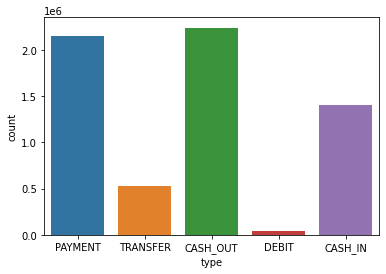

In [0]:
import seaborn as sns
sns.countplot(data.type)  # shows no. of transactions for each payment type

This shows fraud trasactions have happened only for cash_out and Transfer payment types. Also, only 16 of the fraud transactions(Transfer type) have been flagged Fraud

In [0]:
data.groupby('type')['isFraud','isFlaggedFraud'].sum()

,isFraud,isFlaggedFraud
type,,
CASH_IN,0,0
CASH_OUT,4116,0
DEBIT,0,0
PAYMENT,0,0
TRANSFER,4097,16


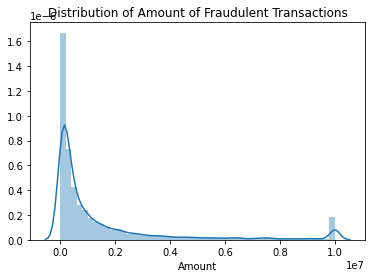

In [0]:
import matplotlib.pyplot as plt
#Distribution of amount in fraudulent transactions
sns.distplot(data.loc[data.isFraud == 1].amount)
plt.xlabel('Amount')
plt.title('Distribution of Amount of Fraudulent Transactions')
plt.show()

In [0]:
(abs(data['amount'])).equals(abs(data['newbalanceOrig'])-abs(data['oldbalanceOrg']))

False

In [0]:
(abs(data['amount'])).equals(abs(data['newbalanceDest'])-abs(data['oldbalanceDest']))

False

In [0]:
wrong_orig_bal = sum(data["oldbalanceOrg"] - data["amount"] != data["newbalanceOrig"])
wrong_dest_bal = sum(data["newbalanceDest"] + data["amount"] != data["newbalanceDest"])
print("Percentage of observations with balance errors in the account giving money: ", 100*round(wrong_orig_bal/len(data),2))
print("Percentage of observations with balance errors in the account receiving money: ", 100*round(wrong_dest_bal/len(data),2))

Percentage of observations with balance errors in the account giving money:  85.0
Percentage of observations with balance errors in the account receiving money:  100.0


From observations, the amount transacted does not reflect in before and after balances of the source and destination accounts. Also,there are many instances where what happens to the recipient account (oldbalanceDest, newbalanceDest) does not make sense (e.g. the very first observation involved a payment of non-zero yet, the balance before and after the transaction equals 0 Eg: First observation)

In [0]:
data['nameOrig'].value_counts().sort_values(ascending=False).head(10)  #checking no. of transactions per customer who initiated transaction to check for unusual patterns
#Note fraud transaction can also be done in one single transaction

C363736674     3
C2098525306    3
C400299098     3
C2051359467    3
C1530544995    3
C1832548028    3
C724452879     3
C1976208114    3
C1462946854    3
C1784010646    3
Name: nameOrig, dtype: int64

In [0]:
 data.groupby('nameOrig')['isFraud'].value_counts().tail(10)

nameOrig    isFraud
C999993700  0          1
C999993966  0          1
C999994518  0          1
C999995025  0          1
C999996950  0          1
C999996999  0          1
C999998175  0          1
C999999254  0          1
C999999614  0          1
C999999784  0          1
Name: isFraud, dtype: int64

In [0]:
data['nameDest'].value_counts().sort_values(ascending=False).head(10) # checking no. of transactions per customer who received money to check for unusual patterns
#Note fraud transaction can also be done in one single transaction

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C1789550256     99
C451111351      99
C1360767589     98
C1023714065     97
Name: nameDest, dtype: int64

In [0]:
data.groupby('nameDest')['isFraud'].value_counts().head(10)

nameDest     isFraud
C1000004082  0           6
C1000004940  0          13
C1000013769  0          13
C100001587   0           9
C1000015936  0          16
C1000022185  0          16
C1000026379  0           4
C1000030947  0          16
C100003532   0           1
C1000038153  0          16
Name: isFraud, dtype: int64

One feature of the dataset that is not immediately presented on the kaggle overview page is the account types "C" (customer) and "M"(Merchant), which would be the first character for each value under nameOrig and nameDest.

Creating a feature "type1" which is a categorical variable with levels "CC" (Customer to Customer), "CM" (Customer to Merchant), "MC" (Merchant to Customer), "MM" (Merchant to Merchant).

In [0]:
import numpy as np

# adding feature type1
data_new = data.copy() # creating copy of dataset in case I need original dataset
data_new["type1"] = np.nan # initializing feature column

# filling feature column
data_new.loc[data.nameOrig.str.contains('C') & data.nameDest.str.contains('C'),"type1"] = "CC" 
data_new.loc[data.nameOrig.str.contains('C') & data.nameDest.str.contains('M'),"type1"] = "CM"
data_new.loc[data.nameOrig.str.contains('M') & data.nameDest.str.contains('C'),"type1"] = "MC"
data_new.loc[data.nameOrig.str.contains('M') & data.nameDest.str.contains('M'),"type1"] = "MM"

In [0]:
# adding features errorBalanceOrg, errorBalanceDest
data_new["errorBalanceOrg"] = data_new.newbalanceOrig + data_new.amount - data_new.oldbalanceOrg
data_new["errorBalanceDest"] = data_new.oldbalanceDest + data_new.amount - data_new.newbalanceDest

In [0]:
#compare valid transactions against fraud transactions instead of overall trends.
# Subsetting data into observations with fraud and valid transactions:
fraud = data_new[data_new["isFraud"] == 1]
valid = data_new[data_new["isFraud"] == 0]

In [0]:
# seeing the counts of transactions by type1 (CC,CM,MC,MM)
print("Fraud transactions by type1: \n",fraud.type1.value_counts())
print("\nValid transactions by type1: \n",valid.type1.value_counts())

Fraud transactions by type1: 
 CC    8213
Name: type1, dtype: int64

Valid transactions by type1: 
 CC    4202912
CM    2151495
Name: type1, dtype: int64


In [0]:
Conclusion: From the dataset, it seems that fraud transactions only occur when the transaction type1 is CC (Customer to Customer)

Data shows that transaction only occur when transaction type1 is CC.

This also means that the datasets fraud and valid don't need to be subsetted. However, since all relevant observations have type1 = "CC", the type1 column is no longer necessary.

In [0]:
# getting rid of type1 column.

fraud = fraud.drop('type1', 1)
valid = valid.drop('type1',1)
data_new = data_new.drop('type1',1)

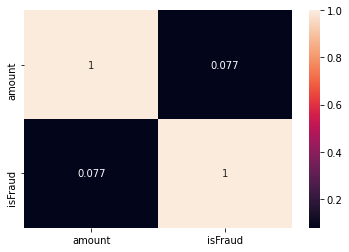

In [0]:
#checking if the amount of transactions has a correlation with Fraud payments
sns.heatmap(data_new[['amount','isFraud']].corr(),annot = True)

In [0]:
data_new.step.nunique() #checking total number of steps

743

In [0]:
#checking valid and fraud transactions with time
data_new['step_day'] = data_new['step'].map(lambda x: x//24)
data_new['hour'] = data_new['step_day'].map(lambda x: x%24)
data_new['step_week'] = data_new['step_day'].map(lambda x: x//7)

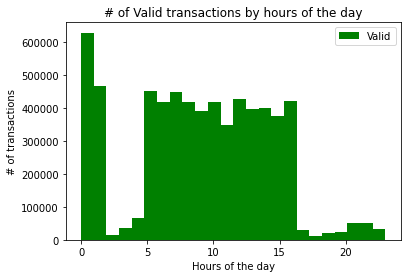

In [0]:
import matplotlib.pyplot as plt

data_new[(data_new.isFraud == 0)]['hour'].plot.hist(bins=24,color='green',label='Valid')
plt.xlabel("Hours of the day")
plt.ylabel("# of transactions")
plt.title("# of Valid transactions by hours of the day")
plt.legend()
plt.show()

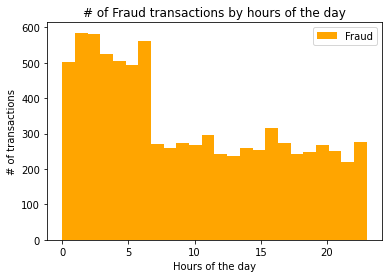

In [0]:
data_new[(data_new.isFraud == 1)]['hour'].plot.hist(bins=24,color='orange',label='Fraud')
plt.xlabel("Hours of the day")
plt.ylabel("# of transactions")
plt.title("# of Fraud transactions by hours of the day")
plt.legend()
plt.show()

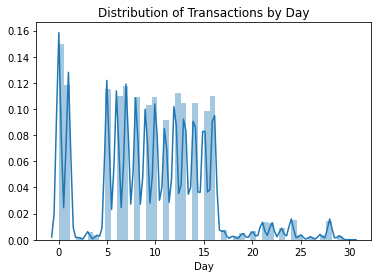

In [0]:
# Distribution of all transactions by day 
sns.distplot(data_new.step_day)
plt.xlabel('Day')
plt.title('Distribution of Transactions by Day')
plt.show()

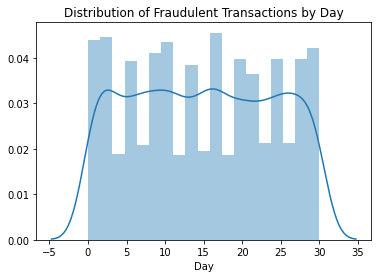

In [0]:
# Distribution of fraudulent transactions by day 
sns.distplot(data_new.loc[data_new.isFraud == 1].step_day)
plt.xlabel('Day')
plt.title('Distribution of Fraudulent Transactions by Day')
plt.show()

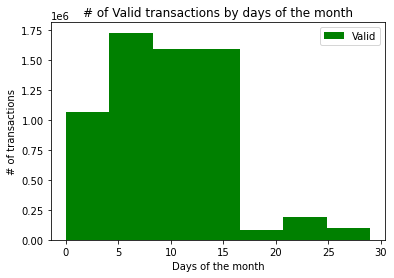

In [0]:
data_new[(data_new.isFraud == 0)]['step_day'].plot.hist(bins=7,color='green',label='Valid')
plt.xlabel("Days of the month")
plt.ylabel("# of transactions")
plt.title("# of Valid transactions by days of the month")
plt.legend()
plt.show()

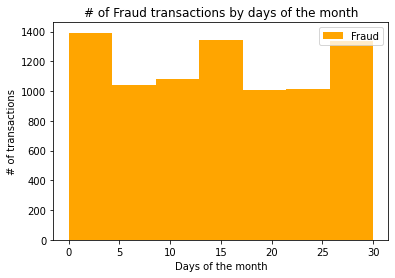

In [0]:
fig, ax = plt.subplots() #1,2, figsize=(7,9)
data_new[(data_new.isFraud == 1)]['step_day'].plot.hist(bins=7,color='orange',label='Fraud')
plt.xlabel("Days of the month")
plt.ylabel("# of transactions")
plt.title("# of Fraud transactions by days of the month")
plt.legend()
plt.show()

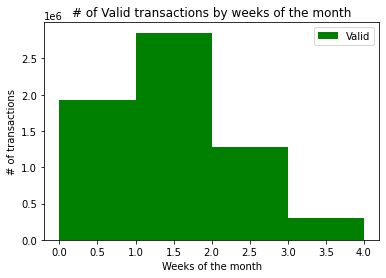

In [0]:
data_new[(data_new.isFraud == 0)]['step_week'].plot.hist(bins=4,color='green',label='Valid')
plt.xlabel("Weeks of the month")
plt.ylabel("# of transactions")
plt.title("# of Valid transactions by weeks of the month")
plt.legend()
plt.show()

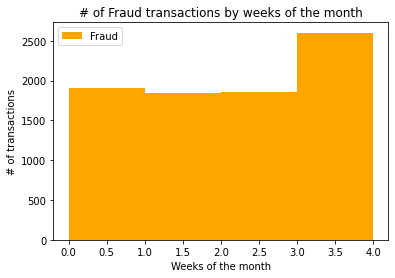

In [0]:
data_new[(data_new.isFraud == 1)]['step_week'].plot.hist(bins=4,color='orange',label='Fraud')
plt.xlabel("Weeks of the month")
plt.ylabel("# of transactions")
plt.title("# of Fraud transactions by weeks of the month")
plt.legend()
plt.show()

In [0]:
data_new.head(3)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,errorBalanceOrg,errorBalanceDest,step_day,hour,step_week
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0.0,9839.64,0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0.0,1864.28,0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0.0,181.00,0,0,0


In [0]:
# Fraud destribution
data_new.isFraud.value_counts(normalize=True)*100

0    99.870918
1     0.129082
Name: isFraud, dtype: float64

In [0]:
#Taking log transformation of non-categorical data for reducing variance
datanew1 = data_new.copy()
# numerical columns
f1 = ['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

 log transformation
#datanew1.loc[:,f1] =  np.log(datanew1.loc[:,f1]+1)

In [0]:
# scaling
from sklearn.preprocessing import MinMaxScaler # normalization
sc = MinMaxScaler()

datanew1.loc[:,f1] = sc.fit_transform(datanew1.loc[:,f1])

In [0]:
#One-Hot Encoding

#A dummy data frame will be created to extract type.CASH_OUT and type.TRANSFER, which were combined with all the other variables.

# Get dummies of transaction type 
types = pd.get_dummies(datanew1.type)
data = datanew1.join(types)



In [0]:
#Understanding Feature Correlation
# Understanding correlation between each feature and the target variable 
feature_corr=data.corr()
feature_corr["isFraud"].sort_values(ascending=False)

isFraud             1.000000
amount              0.076688
errorBalanceDest    0.055120
TRANSFER            0.053869
isFlaggedFraud      0.044109
step_day            0.032577
step                0.031578
step_week           0.030172
CASH_OUT            0.011256
oldbalanceOrg       0.010154
hour                0.003745
newbalanceDest      0.000535
DEBIT              -0.002911
oldbalanceDest     -0.005885
newbalanceOrig     -0.008148
errorBalanceOrg    -0.011283
CASH_IN            -0.019089
PAYMENT            -0.025697
Name: isFraud, dtype: float64

In [0]:
 #It appears type-TRANSFER, step_day,errorBalanceDest, oldbalanceOrg and amount have relative high correlations with isFraud.

In [0]:
                                                                                #  Feauture Engineering

 Total Transactions: CASH_IN 1399284
CASH_OUT 2237500 
DEBIT 41432 
PAYMENT 2151495 
TRANSFER 532909

 Fraudulant Transactions: CASH_IN 0
CASH_OUT 4116
DEBIT 0 
PAYMENT 0
TRANSFER 4097

It turns out all the fraudulent records were either CASH_OUT or TRANSFER.

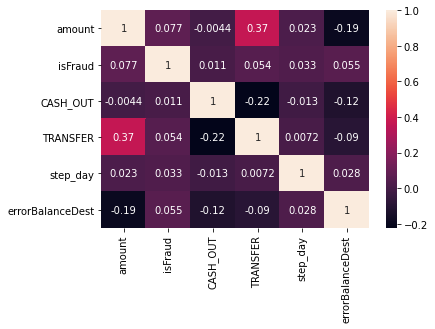

In [0]:
sns.heatmap(data[['amount','isFraud','CASH_OUT', 'TRANSFER', 'step_day','errorBalanceDest']].corr(),annot = True)

Local Outlier Factor(LOF) Algorithm-Density-Based Anomaly Detection. The LOF algorithm is an unsupervised outlier detection method which computes the local density deviation of a given data point with respect to its neighbors. It considers as outlier samples that have a substantially lower density than their neighbors.
The number of neighbors considered, (parameter n_neighbors) is typically chosen 1) greater than the minimum number of objects a cluster has to contain, so that other objects can be local outliers relative to this cluster, and 2) smaller than the maximum number of close by objects that can potentially be local outliers.

In [0]:

X = data.drop(['isFraud', 'type', 'nameOrig', 'nameDest','isFlaggedFraud','step','hour','step_week','DEBIT','oldbalanceDest','CASH_IN','PAYMENT','newbalanceOrig','errorBalanceOrg'], axis = 1)
Y = data.isFraud

In [0]:
# Print shapes
print(X.shape)
print(Y.shape)

(6362620, 7)
(6362620,)


In [0]:
X.head(2)

,amount,oldbalanceOrg,newbalanceDest,errorBalanceDest,step_day,CASH_OUT,TRANSFER
0,0.501265,0.672760,0.0,9839.64,0,0,0
1,0.410594,0.556564,0.0,1864.28,0,0,0


In [0]:
# Split dataset into 80% train and 20% validation

from sklearn.model_selection import train_test_split

SEED=42

x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size= 0.2,random_state= SEED)

In [0]:
Fraud = data[data['isFraud'] == 1]
Valid = data[data['isFraud'] == 0]

In [0]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [0]:
outlier_fraction = len(Fraud)/float(len(Valid))

In [0]:
print(outlier_fraction)

0.0012924888191769902


In [0]:
a = LocalOutlierFactor(n_neighbors = 20,contamination = outlier_fraction)
model = a.fit(x_train) # Fitting the model.
predic=a.fit_predict(x_test)
predic[predic == 1] = 0 #non fraud
predic[predic == -1] = 1  #fraud
errors = (predic != y_test).sum() # Total number of errors is calculated.
print(errors)
print(accuracy_score(predic,y_test))
print(classification_report(predic,y_test))

3003
0.9976401230939456
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270879
           1       0.08      0.08      0.08      1645

    accuracy                           1.00   1272524
   macro avg       0.54      0.54      0.54   1272524
weighted avg       1.00      1.00      1.00   1272524



Or try this


plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

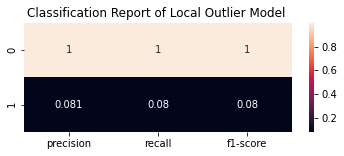

In [0]:
from sklearn.metrics import classification_report

clf_report = classification_report(predic,y_test, output_dict=True)

df = pd.DataFrame(clf_report).iloc[:-1, :2].T

fig, ax = plt.subplots(figsize = (6, 2))
sns.heatmap(df, annot=True)
plt.title("Classification Report of Local Outlier Model ")
ax.set_ylim(len(df)+0, -0)
fig.savefig("file", bbox_inches = 'tight')
plt.show()

check for overfitting:

In [0]:
chk=a.fit_predict(x_train)
chk1=[0 if x==1 else 1 for x in chk]
print(classification_report(chk1,y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   5083517
           1       0.00      0.00      0.00      6579

    accuracy                           1.00   5090096
   macro avg       0.50      0.50      0.50   5090096
weighted avg       1.00      1.00      1.00   5090096



                                                       Basic Nueral AutoEncoder

An autoencoder is a type of artificial neural network used to learn efficient data codings in an unsupervised manner.

The aim of an autoencoder is to learn a representation (encoding) for a set of data, typically for the purpose of dimensionality reduction.

An autoencoder learns to compress data from the input layer into a short code, and then uncompress that code into something that closely matches the original data. They learn how to ignore noise. This can be used for anomaly detection

We optimize the parameters of our Autoencoder model in such way that a special kind of error — reconstruction error is minimized. 

In [0]:

from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard

#from tensorflow.contrib.layers import fully_connected

from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers


from keras import backend as K
#K.tensorflow_backend._get_available_gpus()


from scipy import stats


from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve
from sklearn.metrics import precision_recall_fscore_support, f1_score

from pylab import rcParams


Using TensorFlow backend.


In [0]:
X = X = data.drop([ 'type', 'nameOrig', 'nameDest','isFlaggedFraud','step_day','hour','step_week','oldbalanceDest','newbalanceOrig','oldbalanceOrg','newbalanceDest','type1'], axis = 1)
Y = data.isFraud

In [0]:
X.tail(5)

,step,amount,isFraud,errorBalanceOrg,errorBalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
6362615,743,0.003674,1,0.0,0.000000e+00,0,1,0,0,0
6362616,743,0.068272,1,0.0,6.311409e+06,0,0,0,0,1
6362617,743,0.068272,1,0.0,1.000000e-02,0,1,0,0,0
6362618,743,0.009195,1,0.0,8.500025e+05,0,0,0,0,1
6362619,743,0.009195,1,0.0,9.313226e-10,0,1,0,0,0


Vectorize  #not needed for auto encoders as there are no categorical data now and no image as well.

In [0]:
#tokenizer = Tokenizer(filters='\t\n', char_level=True)
#tokenizer.fit_on_texts(X)

# we will need this later
#num_words = len(tokenizer.word_index)+1
#X = tokenizer.texts_to_sequences(X)

In [0]:
from sklearn.model_selection import train_test_split

train_x, test_x = train_test_split(X, test_size=0.2, random_state=SEED)
train_x = train_x[train_x.isFraud == 0] #where normal transactions
train_x = train_x.drop(['isFraud'], axis=1) #drop the class column


test_y = test_x['isFraud'] #save the class column for the test set for validation
test_x = test_x.drop(['isFraud'], axis=1) #drop the class column

train_x = train_x.values #transform to ndarray
test_x = test_x.values

In [0]:
#Additionally, L1 regularization will be used during training:
nb_epoch = 15  
batch_size = 80
input_dim = train_x.shape[1] #num of columns
encoding_dim = 8
hidden_dim = 5 # usually int(encoding_dim / 2) 
learning_rate = 1e-7

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", activity_regularizer=regularizers.l1(learning_rate))(input_layer)
encoder = Dense(hidden_dim, activation="relu")(encoder)
decoder = Dense(hidden_dim, activation='tanh')(encoder)
decoder = Dense(input_dim, activation='sigmoid')(decoder) 
autoencoder = Model(inputs=input_layer, outputs=decoder)

In [0]:
autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='adam')

cp = ModelCheckpoint(filepath="autoencoder_fraud.h5",
                               save_best_only=True,
                               verbose=0)

tb = TensorBoard(log_dir='./logs',
                histogram_freq=0,
                write_graph=True,
                write_images=True)

history = autoencoder.fit(train_x, train_x,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_split = 0.2,

                    verbose=1,
                    callbacks=[cp, tb]).history

Train on 4066802 samples, validate on 1016701 samples
Epoch 1/15
4066802/4066802 [==============================] - 280s 69us/step - loss: 66961677620.9838 - accuracy: 0.1990 - val_loss: 65439630173.6236 - val_accuracy: 0.0508
Epoch 2/15
4066802/4066802 [==============================] - 279s 69us/step - loss: 66961677254.3979 - accuracy: 0.0595 - val_loss: 65439630174.9934 - val_accuracy: 0.0508
Epoch 3/15
4066802/4066802 [==============================] - 280s 69us/step - loss: 66961677270.6463 - accuracy: 0.0515 - val_loss: 65439630175.5574 - val_accuracy: 0.0508
Epoch 4/15
4066802/4066802 [==============================] - 281s 69us/step - loss: 66961677121.6849 - accuracy: 0.0515 - val_loss: 65439630178.2163 - val_accuracy: 0.0508
Epoch 5/15
4066802/4066802 [==============================] - 280s 69us/step - loss: 66961677097.5191 - accuracy: 0.0513 - val_loss: 65439630180.9156 - val_accuracy: 0.0508
Epoch 6/15
4066802/4066802 [==============================] - 279s 68us/step - lo

In [0]:
autoencoder = load_model('autoencoder_fraud.h5')

                                                              Model Evaluation

In [0]:
#import matplotlib.pyplot as plt

#plt.plot(history['loss'], linewidth=2, label='Train')
#plt.plot(history['val_loss'], linewidth=2, label='Test')
#plt.legend(loc='upper right')
##plt.title('Model loss')
#plt.ylabel('Loss')
#plt.xlabel('Epoch')
#####plt.ylim(ymin=0.70,ymax=1)
#plt.show()

In [0]:
#Reconstruction Error Check
test_x_predictions = autoencoder.predict(test_x)
mse = np.mean(np.power(test_x - test_x_predictions, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': test_y})
error_df.describe()

,Reconstruction_error,True_class
count,1.272524e+06,1.272524e+06
mean,6.825268e+10,1.273060e-03
std,2.353352e+12,3.565727e-02
min,1.014531e-03,0.000000e+00
25%,1.750382e+07,0.000000e+00
50%,7.482460e+08,0.000000e+00
75%,9.611069e+09,0.000000e+00
max,6.955277e+14,1.000000e+00


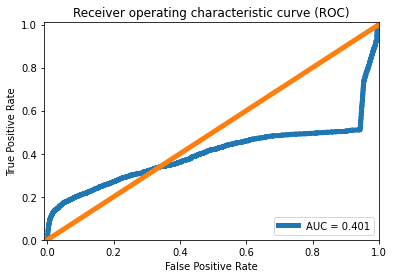

In [0]:
#ROC Curve Check
false_pos_rate, true_pos_rate, thresholds = roc_curve(error_df.True_class, error_df.Reconstruction_error)
roc_auc = auc(false_pos_rate, true_pos_rate,)

plt.plot(false_pos_rate, true_pos_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=5)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The ROC curve plots the true positive rate versus the false positive rate, over different threshold values.ROC doesn’t look very useful for us.

 Precision measures the relevancy of obtained results. Recall, on the other hand, measures how many relevant results are returned.

A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall)

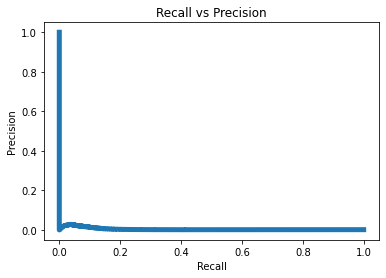

In [0]:
#Recall vs. Precision Thresholding
precision_rt, recall_rt, threshold_rt = precision_recall_curve(error_df.True_class, error_df.Reconstruction_error)
plt.plot(recall_rt, precision_rt, linewidth=5, label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

Future work:
Encoder and k-NN
In our second method, we will use the encoder part of an autoencoder. The encoder will map the instances into a low dimensional space and k-Nearest Neighbors (k-NN) will be used for the classification. In this method both fraudulent and non-fraudulent transactions will be used to train the encoder. It can be said that the encoder will be used for dimension reduction speeding up this way the execution of k-NN